# **Internship - Task 2 (Text Sentiment Analysis)**
# **DevelopersHub Corportation**

In [6]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')

In [8]:
# Show the fist few rows of the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
# Show the last few rows of the dataset
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [10]:
# Show some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
# Show the total rows and columns of the dataset
df.shape

(50000, 2)

In [12]:
# Examine the data types of each column
df.dtypes

,0
review,object
sentiment,object


In [13]:
# Check for missing values
df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49995,False,False
49996,False,False
49997,False,False
49998,False,False


In [14]:
df.isnull().sum()

,0
review,0
sentiment,0


In [15]:
# Check for duplicated values
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
49995,False
49996,False
49997,False
49998,False


In [16]:
df.duplicated().sum()

np.int64(418)

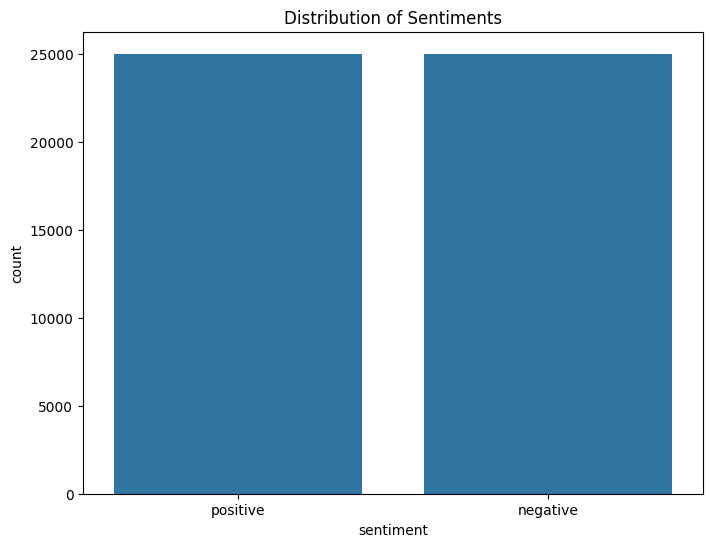

In [18]:
# Analyze the distribution of the 'sentiment' column
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

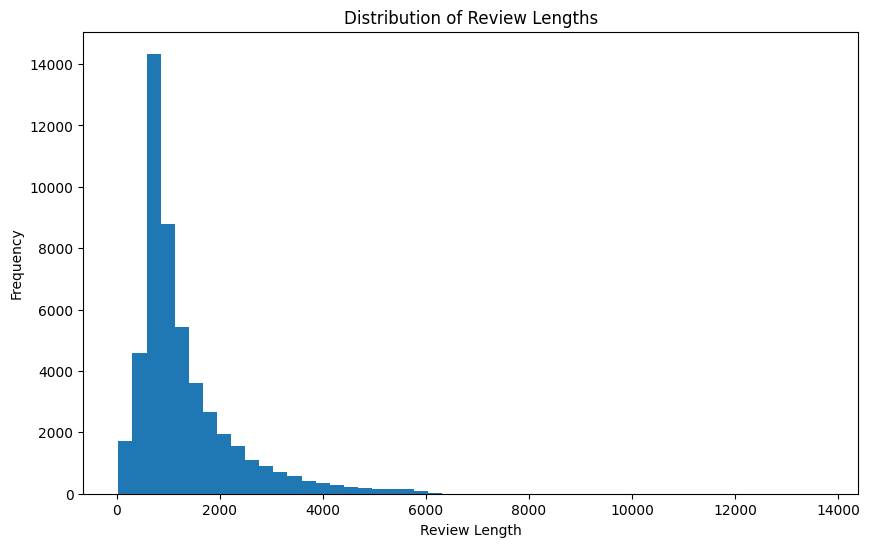

In [19]:
# Analyze the text length in the 'review' column
df['review_length'] = df['review'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
plt.show()

In [20]:
# Drop duplicate rows, keeping the first occurrence
df.drop_duplicates(inplace=True, keep='first')

In [21]:
df.head()

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [24]:
# Create a copy to avoid modifying the original DataFrame
df_prepared = df[['review', 'sentiment']].copy()

# Convert sentiment to numerical labels
df_prepared['sentiment_label'] = df_prepared['sentiment'].map({'positive': 1, 'negative': 0})

# Drop the original 'sentiment' column
df_prepared = df_prepared.drop('sentiment', axis=1)

In [25]:
df_prepared.head()

,review,sentiment_label
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [28]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [w for w in tokens if not w in stop_words and w.isalnum()]
    lemmas = [lemmatizer.lemmatize(w) for w in filtered_tokens]
    return " ".join(lemmas)

df_prepared['preprocessed_review'] = df_prepared['review'].apply(preprocess_text)
display(df_prepared.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,sentiment_label,preprocessed_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


In [41]:
from wordcloud import WordCloud

# Filter the DataFrame for positive reviews
pos_reviews = df_prepared[df_prepared['sentiment_label'] == 1]

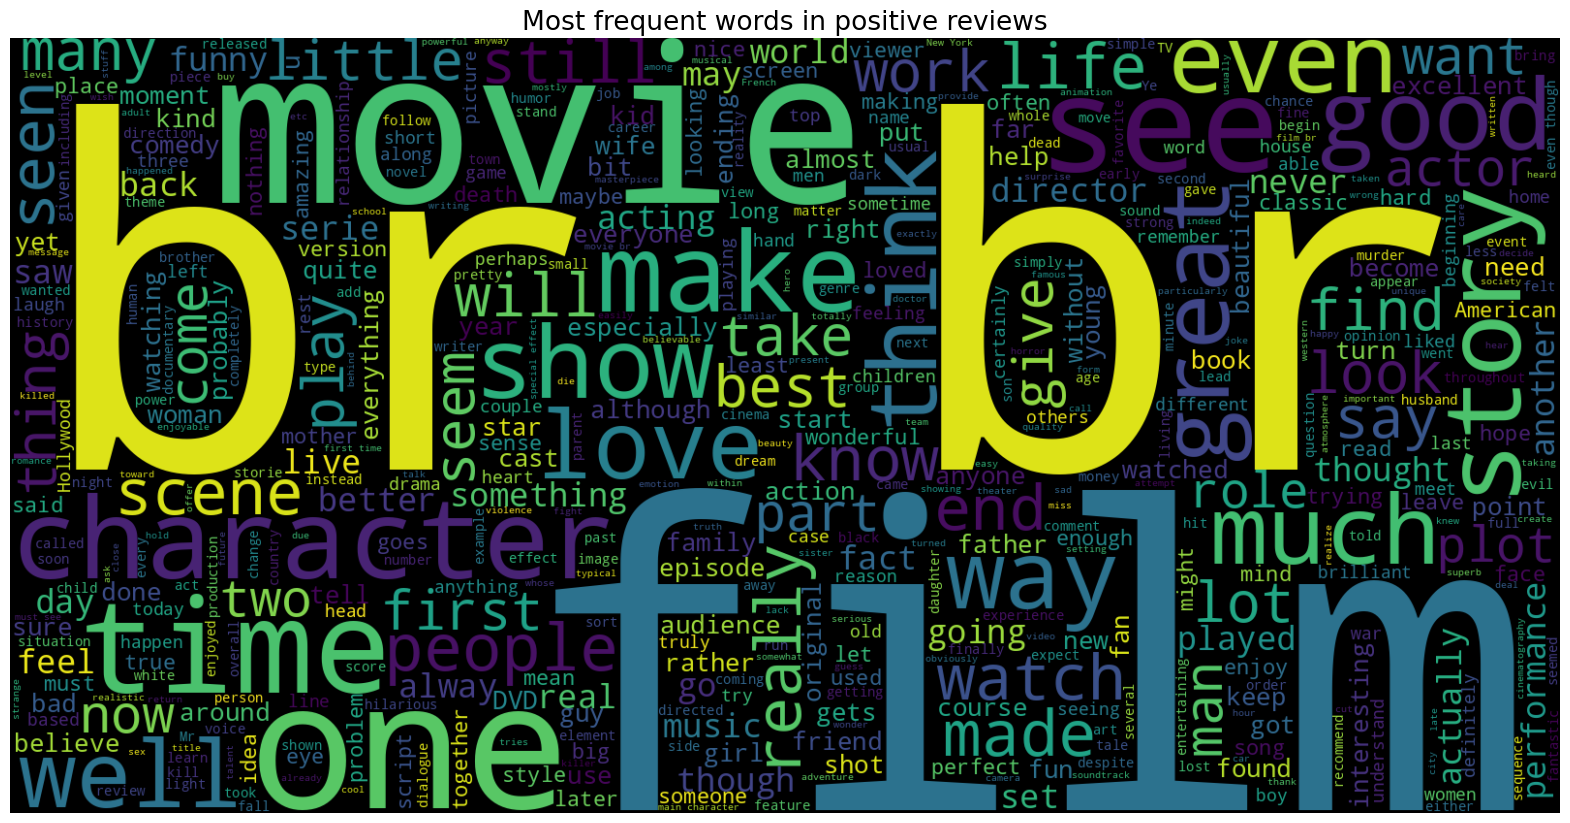

In [42]:
# Now generate the word cloud using pos_reviews
text = " ".join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words in positive reviews", fontsize=19)
plt.show()

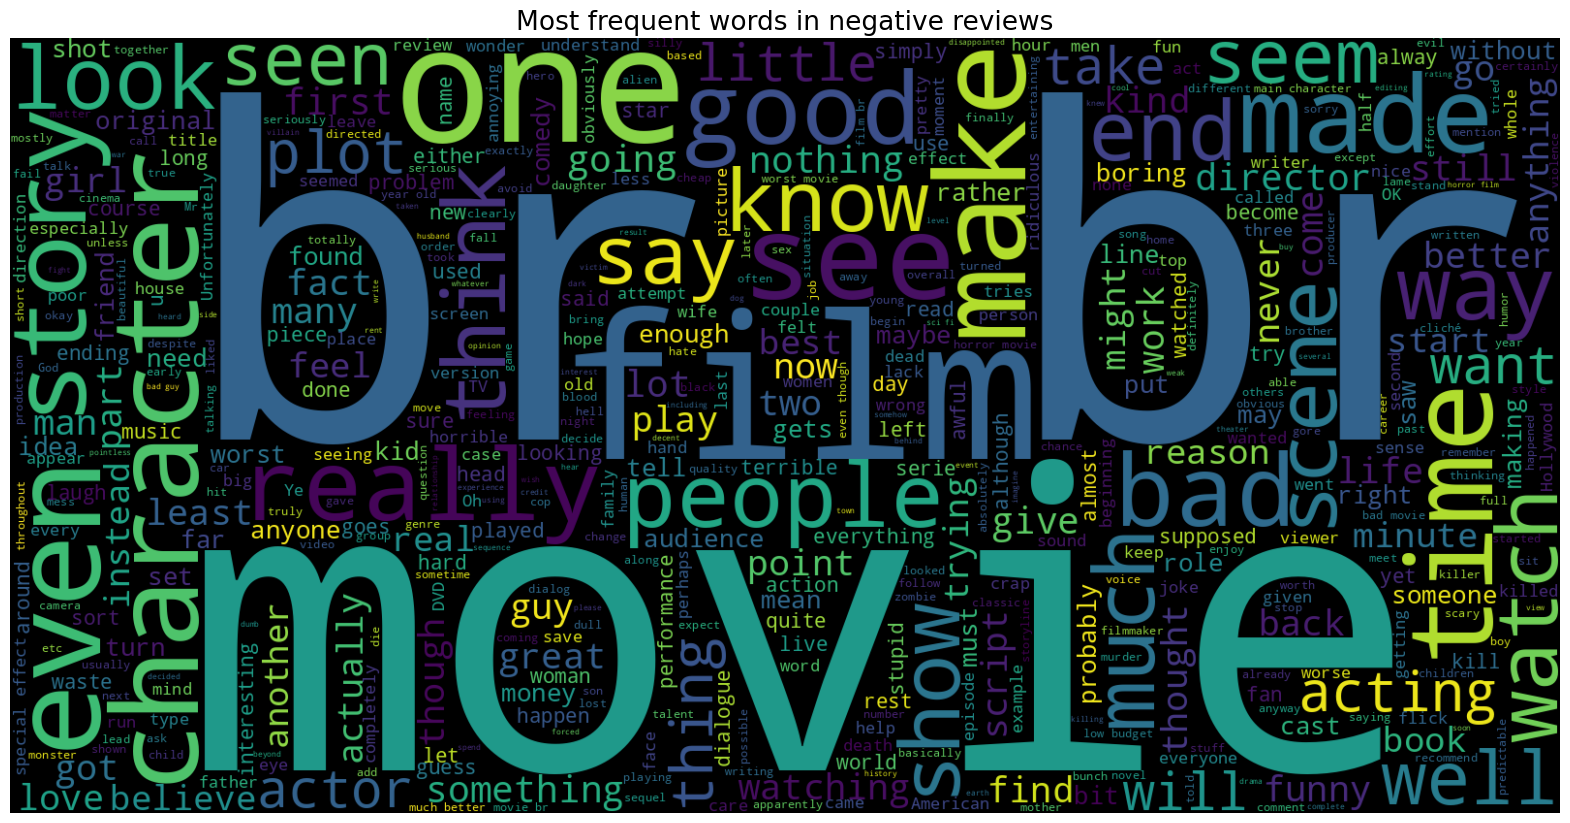

In [44]:
# Filter the DataFrame for negative reviews

neg_reviews = df_prepared[df_prepared['sentiment_label'] == 0]

text = " ".join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most frequent words in negative reviews", fontsize=19)
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary size to 5000

# Fit and transform the preprocessed reviews
tfidf_matrix = vectorizer.fit_transform(df_prepared['preprocessed_review'])

In [33]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, df_prepared['sentiment_label'], test_size=0.2, random_state=42
)

In [35]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increased max_iter
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
from sklearn.metrics import classification_report

# Predict sentiment labels for the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.90      0.89      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB(alpha=1.0) # Experiment with different alpha values
nb_model.fit(X_train, y_train)

# Predict sentiment labels for the test data using the Naive Bayes model
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes Classifier Performance:")
print(classification_report(y_test, y_pred_nb))

print("\nLogistic Regression Classifier Performance (from previous step):")
print(classification_report(y_test, y_pred)) # Assuming y_pred is from the logistic regression

Naive Bayes Classifier Performance:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4939
           1       0.85      0.86      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917


Logistic Regression Classifier Performance (from previous step):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.90      0.89      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917

